In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# WeatherPy
### Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    location = [city, lat_lng[0], lat_lng[1]]
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(location)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 1500


In [5]:
cities_df = pd.DataFrame(cities, columns=['city', 'lat', 'lng'])
cities_df.head()

,city,lat,lng
0,margaret river,-36.173522,92.742767
1,tazovsky,82.305687,73.655962
2,fale old settlement,-6.194709,-159.674869
3,ilulissat,87.837000,-52.684551
4,port-aux-francais,-70.119382,101.793605


In [6]:
### Generate the Cities List by Using the `citipy` Library

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"
#url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, location in cities_df.iterrows():
    
    city, lat, lng = location
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&lat=" + str(lat) + "&lon=" + str(lng)
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        #city_country = # code here
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          #"Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#print(city_data)      

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | fale old settlement
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | tarancon
Processing Record 7 of Set 1 | reggane
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | nemuro
Processing Record 11 of Set 1 | egremont
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | kimbe
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | kingston
Processing Record 18 of Set 1 | haiku-pauwela
Processing Record 19 of Set 1 | puerto aysen
Processing Record 20 of Set 1 | port hedland
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 

Processing Record 41 of Set 4 | howrah
Processing Record 42 of Set 4 | luderitz
Processing Record 43 of Set 4 | kailua-kona
Processing Record 44 of Set 4 | selfoss
Processing Record 45 of Set 4 | xilin hot
Processing Record 46 of Set 4 | la sarre
Processing Record 47 of Set 4 | kayangel
Processing Record 48 of Set 4 | talnakh
Processing Record 49 of Set 4 | anadyr
Processing Record 0 of Set 5 | boyolangu
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | vadso
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | kidal
Processing Record 5 of Set 5 | kapa'a
Processing Record 6 of Set 5 | st. john's
Processing Record 7 of Set 5 | labytnangi
Processing Record 8 of Set 5 | adamstown
Processing Record 9 of Set 5 | la passe
Processing Record 10 of Set 5 | lebu
Processing Record 11 of Set 5 | port-aux-francais
Processing Record 12 of Set 5 | bredasdorp
Processing Record 13 of Set 5 | lompoc
Processing Record 14 of Set 5 | kristiansund
Processing Record 15 of 

Processing Record 33 of Set 8 | adamstown
Processing Record 34 of Set 8 | adamstown
Processing Record 35 of Set 8 | port lincoln
Processing Record 36 of Set 8 | whitehorse
Processing Record 37 of Set 8 | blackmans bay
Processing Record 38 of Set 8 | bethel
Processing Record 39 of Set 8 | salinas
Processing Record 40 of Set 8 | lodja
Processing Record 41 of Set 8 | kimbe
Processing Record 42 of Set 8 | kodiak
Processing Record 43 of Set 8 | constantia
Processing Record 44 of Set 8 | jimenez
Processing Record 45 of Set 8 | constantia
Processing Record 46 of Set 8 | bilibino
Processing Record 47 of Set 8 | margate
Processing Record 48 of Set 8 | keflavik
Processing Record 49 of Set 8 | kristiansund
Processing Record 0 of Set 9 | big bend
Processing Record 1 of Set 9 | ribeira grande
Processing Record 2 of Set 9 | kultali
Processing Record 3 of Set 9 | bethel
Processing Record 4 of Set 9 | khandyga
Processing Record 5 of Set 9 | kingston
Processing Record 6 of Set 9 | roma
Processing Recor

Processing Record 23 of Set 12 | tazovsky
Processing Record 24 of Set 12 | piti village
Processing Record 25 of Set 12 | balkanabat
Processing Record 26 of Set 12 | tamanrasset
Processing Record 27 of Set 12 | happy valley-goose bay
Processing Record 28 of Set 12 | klyuchi
Processing Record 29 of Set 12 | san patricio
Processing Record 30 of Set 12 | sitka
Processing Record 31 of Set 12 | bethel
Processing Record 32 of Set 12 | waitangi
Processing Record 33 of Set 12 | sao jose da coroa grande
Processing Record 34 of Set 12 | ljusdal
Processing Record 35 of Set 12 | adamstown
Processing Record 36 of Set 12 | adamstown
Processing Record 37 of Set 12 | iqaluit
Processing Record 38 of Set 12 | bilibino
Processing Record 39 of Set 12 | port mathurin
Processing Record 40 of Set 12 | yellowknife
Processing Record 41 of Set 12 | saipan
Processing Record 42 of Set 12 | humaita
Processing Record 43 of Set 12 | bethel
Processing Record 44 of Set 12 | mount pearl
Processing Record 45 of Set 12 | 

Processing Record 11 of Set 16 | grytviken
Processing Record 12 of Set 16 | mount pearl
Processing Record 13 of Set 16 | grytviken
Processing Record 14 of Set 16 | port saint john's
Processing Record 15 of Set 16 | adamstown
Processing Record 16 of Set 16 | grytviken
Processing Record 17 of Set 16 | bilibino
Processing Record 18 of Set 16 | jamestown
Processing Record 19 of Set 16 | sitka
Processing Record 20 of Set 16 | waitangi
Processing Record 21 of Set 16 | anadyr
Processing Record 22 of Set 16 | atafu village
Processing Record 23 of Set 16 | esmeraldas
Processing Record 24 of Set 16 | udachny
Processing Record 25 of Set 16 | san carlos
Processing Record 26 of Set 16 | klyuchi
Processing Record 27 of Set 16 | invercargill
Processing Record 28 of Set 16 | port saint john's
Processing Record 29 of Set 16 | bethel
Processing Record 30 of Set 16 | puerto leguizamo
Processing Record 31 of Set 16 | thompson
Processing Record 32 of Set 16 | mount pearl
Processing Record 33 of Set 16 | us

Processing Record 49 of Set 19 | phatthalung
Processing Record 0 of Set 20 | port-aux-francais
Processing Record 1 of Set 20 | adamstown
Processing Record 2 of Set 20 | ghadamis
Processing Record 3 of Set 20 | valparaiso
Processing Record 4 of Set 20 | turpan
Processing Record 5 of Set 20 | port-aux-francais
Processing Record 6 of Set 20 | tura
Processing Record 7 of Set 20 | nguigmi
Processing Record 8 of Set 20 | porto murtinho
Processing Record 9 of Set 20 | olonkinbyen
Processing Record 10 of Set 20 | waitangi
Processing Record 11 of Set 20 | kayangel
Processing Record 12 of Set 20 | edinburgh of the seven seas
Processing Record 13 of Set 20 | grytviken
Processing Record 14 of Set 20 | tiksi
Processing Record 15 of Set 20 | nantucket
Processing Record 16 of Set 20 | port lincoln
Processing Record 17 of Set 20 | wailua homesteads
Processing Record 18 of Set 20 | albany
Processing Record 19 of Set 20 | isangel
Processing Record 20 of Set 20 | adamstown
Processing Record 21 of Set 20 

Processing Record 37 of Set 23 | grytviken
Processing Record 38 of Set 23 | adamstown
Processing Record 39 of Set 23 | cabo san lucas
Processing Record 40 of Set 23 | avarua
Processing Record 41 of Set 23 | corfu
Processing Record 42 of Set 23 | iqaluit
Processing Record 43 of Set 23 | papatowai
Processing Record 44 of Set 23 | mangrol
Processing Record 45 of Set 23 | isafjordur
Processing Record 46 of Set 23 | barclayville
Processing Record 47 of Set 23 | grytviken
Processing Record 48 of Set 23 | fort bragg
Processing Record 49 of Set 23 | abraham's bay
Processing Record 0 of Set 24 | avarua
Processing Record 1 of Set 24 | west island
Processing Record 2 of Set 24 | klaksvik
Processing Record 3 of Set 24 | hilo
Processing Record 4 of Set 24 | petropavlovsk-kamchatsky
Processing Record 5 of Set 24 | anadyr
Processing Record 6 of Set 24 | olhao
Processing Record 7 of Set 24 | thompson
Processing Record 8 of Set 24 | aasiaat
Processing Record 9 of Set 24 | olonkinbyen
Processing Record 

Processing Record 24 of Set 27 | ahau
Processing Record 25 of Set 27 | sodra sandby
Processing Record 26 of Set 27 | qaqortoq
Processing Record 27 of Set 27 | bamboo flat
Processing Record 28 of Set 27 | puerto natales
Processing Record 29 of Set 27 | olonkinbyen
Processing Record 30 of Set 27 | lucapa
Processing Record 31 of Set 27 | el alto
Processing Record 32 of Set 27 | iqaluit
Processing Record 33 of Set 27 | waitangi
Processing Record 34 of Set 27 | taiohae
Processing Record 35 of Set 27 | grytviken
Processing Record 36 of Set 27 | vinita
Processing Record 37 of Set 27 | sasebo
Processing Record 38 of Set 27 | yarmouth
Processing Record 39 of Set 27 | ilulissat
Processing Record 40 of Set 27 | mitu
Processing Record 41 of Set 27 | sao jose da coroa grande
Processing Record 42 of Set 27 | iqaluit
Processing Record 43 of Set 27 | edinburgh of the seven seas
Processing Record 44 of Set 27 | longyearbyen
Processing Record 45 of Set 27 | yalta
Processing Record 46 of Set 27 | port-au

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE
#city_data_df.head()
# Show Record Count
city_data_df.count()

City          1497
Lat           1497
Lng           1497
Max Temp      1497
Humidity      1497
Cloudiness    1497
Wind Speed    1497
Date          1497
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,margaret river,-36.1735,92.7428,13.27,66,100,8.57,1690381506
1,tazovsky,82.3057,73.6560,0.17,96,100,3.86,1690381507
2,fale old settlement,-6.1947,-159.6749,27.87,72,80,8.83,1690381507
3,ilulissat,87.8370,-52.6846,0.32,92,100,5.39,1690381511
4,port-aux-francais,-70.1194,101.7936,-56.45,76,94,7.47,1690381513


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,margaret river,-36.1735,92.7428,13.27,66,100,8.57,1690381506
1,tazovsky,82.3057,73.6560,0.17,96,100,3.86,1690381507
2,fale old settlement,-6.1947,-159.6749,27.87,72,80,8.83,1690381507
3,ilulissat,87.8370,-52.6846,0.32,92,100,5.39,1690381511
4,port-aux-francais,-70.1194,101.7936,-56.45,76,94,7.47,1690381513


In [ ]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

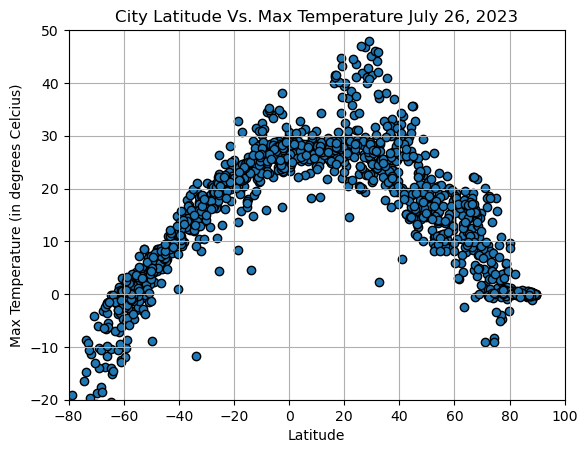

In [22]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y_temp = city_data_df["Max Temp"]

lat_temp = city_data_df[["Lat", "Max Temp"]]
plt.scatter(x,y_temp,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (in degrees Celcius)")
plt.title("City Latitude Vs. Max Temperature July 26, 2023")
plt.xlim(-80,100)
plt.ylim(-20,50)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [14]:
#### Latitude Vs. Humidity

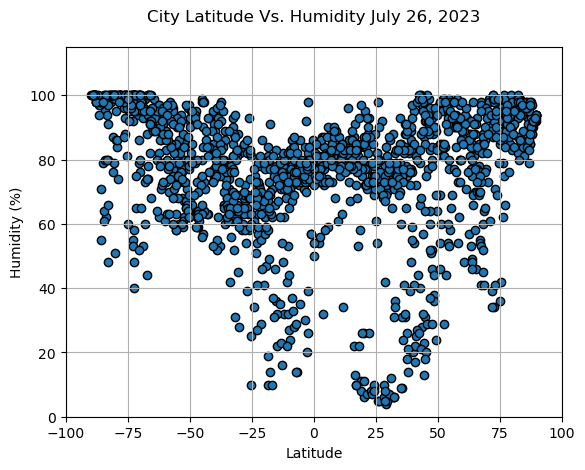

In [23]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y_hum= city_data_df["Humidity"]

lat_temp = city_data_df[["Lat", "Humidity"]]
plt.scatter(x,y_hum,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humidity July 26, 2023\n")

plt.xlim(-100,100)
plt.ylim(0,115)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
#### Latitude Vs. Cloudiness

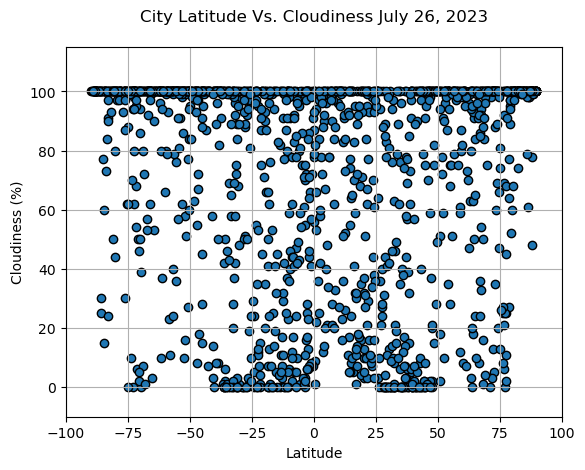

In [26]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y_cloud = city_data_df["Cloudiness"]

lat_temp = city_data_df[["Lat", "Cloudiness"]]
plt.scatter(x,y_cloud,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs. Cloudiness July 26, 2023\n")

plt.xlim(-100,100)
plt.ylim(-10,115)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
#### Latitude vs. Wind Speed Plot

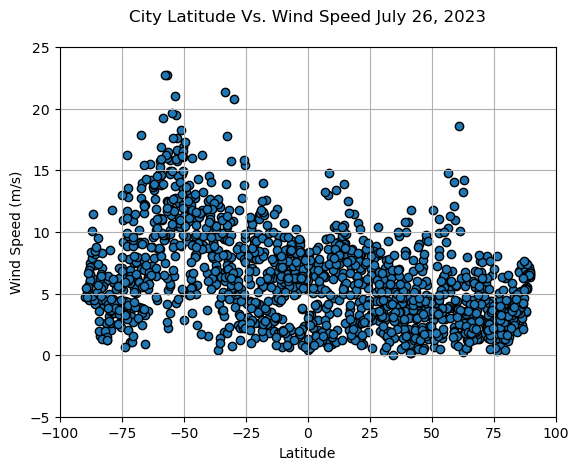

In [29]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]

lat_temp = city_data_df[["Lat", "Wind Speed"]]
plt.scatter(x,y_wind,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude Vs. Wind Speed July 26, 2023\n")

plt.xlim(-100,100)
plt.ylim(-5,25)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [30]:
### Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]

#y_values
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloud = city_data_df['Cloudiness']
wind = city_data_df['Wind Speed']

(slope, intercept, rvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_whatever)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (x,y where I want the line), fontsize = 15, color = "red")

plt.xlabel('')
plt.ylabel('')
plt.title('')

plt.show()

City_ID
0        8.57
1        3.86
2        8.83
3        5.39
4        7.47
        ...  
1492     6.83
1493     4.18
1494     0.62
1495    10.23
1496     8.55
Name: Wind Speed, Length: 1497, dtype: float64

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

In [ ]:
###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE